## **Open-ended Narrative Task**
**Data Loading and Preprocessing**

In [ ]:
!pip install python-igraph
!pip install python-igraph leidenalg cairocffi
!pip install pingouin
!pip install statannot

import igraph
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Northwell Pipelines/Statistics/dataframes/journaling_graph_tlc.csv')

seq = ['seq_nn', 'seq_ne', 'seq_diameter', 'seq_aspl','seq_awd', 'seq_gd', 'seq_lscc','seq_lscc_z','seq_aspl_z']
w30 = ['w30_nn', 'w30_ne','w30_diameter', 'w30_aspl', 'w30_awd', 'w30_gd', 'w30_lscc','w30_lscc_z','w30_aspl_z']
ap = ['ap_nn', 'ap_ne','ap_diameter','ap_aspl', 'ap_awd', 'ap_gd','ap_lscc', 'ap_lscc_z','ap_aspl_z']
s2ap = ['s2_ap_nn', 's2_ap_ne', 's2_ap_diameter', 's2_ap_aspl','s2_ap_awd', 's2_ap_gd', 's2_ap_lscc','s2_ap_lscc_z', 's2_ap_aspl_z']

size = ['seq_nn', 'ap_nn', 'w30_nn', 's2_ap_nn', 
        'seq_ne', 'ap_ne', 'w30_ne', 's2_ap_ne',
        'seq_diameter',  'ap_diameter','w30_diameter', 's2_ap_diameter',
        'seq_aspl',  'ap_aspl', 'w30_aspl', 's2_ap_aspl', ]

connectedness = ['seq_awd','ap_awd' , 'w30_awd', 's2_ap_awd',
                 'seq_gd', 'ap_gd' , 'w30_gd', 's2_ap_gd',
                 'seq_lscc', 'ap_lscc','w30_lscc', 's2_ap_lscc']

organization = ['seq_lscc_z', 'ap_lscc_z', 'w30_lscc_z', 's2_ap_lscc_z',
                'seq_aspl_z', 'ap_aspl_z', 'w30_aspl_z', 's2_ap_aspl_z']

graph = ap + s2ap + seq + w30

demo = ['study','demo_age','demo_sex', 'demo_gender', 'demo_race','demo_education','demo_caregiver_education']
verbosity = ['word_count','sentence_count','mean_sentence_length']
sans = ['sans_global_asocanhed', 'sans_global_affect', 'sans_global_alogia', 'sans_global_avolition']
bprs = ['bprs_total','bprs_factor_anxdep' ,'bprs_factor_hostsus' ,'bprs_factor_thought', 'bprs_factor_withret']

df['speech disorganization'] = (df['tlc_d03pressure']+df['tlc_d05tangent']+df['tlc_d06derail']+df['tlc_d07incoh']+df['tlc_d08illogic']+df['tlc_d12circum']+df['tlc_d13lossgoal'])/7
df['speech poverty'] = (df['tlc_01povspeech']+df['tlc_02povcontent'])/2


language = ['speech disorganization','speech poverty']
severity = [ 'bprs_total']
dimension = ['bprs_factor_anxdep' ,'bprs_factor_hostsus' ,'bprs_factor_thought', 'bprs_factor_withret','sans_global_asocanhed', 'sans_global_affect', 'sans_global_alogia', 'sans_global_avolition']

clinical = language+severity+dimension
df = df[['uid','anypsychosis', 'group']+demo+verbosity+graph+clinical]

columns_update = {}
for fname in graph:
  a = fname.replace('_', ' ')
  b = a.replace('ap ', 's_ap ')
  b = b.replace('s2 s', 'd')
  b = b.replace('seq', 's_seq')
  b = b.replace('w30', 'd_seq')
  b = b.replace(' z', 'z')
  b = b.replace('gd', 'density')
  columns_update[fname] = b
columns_update['bprs_total'] = 'total bprs score' 
columns_update['bprs_factor_hostsus'] = 'hostility/suspiciousness'
columns_update['bprs_factor_thought'] = 'thought disturbance'
columns_update['bprs_factor_withret'] = 'withdrawal/retardation'
columns_update['sans_global_asocanhed'] = 'asociality/anhedonia'
columns_update['sans_global_affect'] = 'affect flattening'
columns_update['sans_global_alogia'] = 'global alogia'
columns_update['sans_global_avolition'] = 'avolition'
columns_update['bprs_factor_anxdep'] = 'anxiety/depression'
df = df.rename(columns=columns_update)

severity = [ 'total bprs score']
dimension = ['anxiety/depression' ,'hostility/suspiciousness' ,'thought disturbance', 'withdrawal/retardation','asociality/anhedonia', 'affect flattening', 'global alogia', 'avolition']

s_seq = ['s_seq nn', 's_seq ne', 's_seq diameter', 's_seq aspl','s_seq awd', 's_seq density', 's_seq lscc','s_seq lsccz','s_seq asplz']
d_seq = ['d_seq nn', 'd_seq ne','d_seq diameter', 'd_seq aspl', 'd_seq awd', 'd_seq density', 'd_seq lscc','d_seq lsccz','d_seq asplz']
s_ap = ['s_ap nn', 's_ap ne','s_ap diameter','s_ap aspl', 's_ap awd', 's_ap density','s_ap lscc', 's_ap lsccz','s_ap asplz']
d_ap = ['d_ap nn', 'd_ap ne', 'd_ap diameter', 'd_ap aspl','d_ap awd', 'd_ap density', 'd_ap lscc','d_ap lsccz', 'd_ap asplz']

size = ['s_seq nn', 's_ap nn', 'd_seq nn', 'd_ap nn', 
    's_seq ne', 's_ap ne', 'd_seq ne', 'd_ap ne',
    's_seq diameter', 's_ap diameter','d_seq diameter', 'd_ap diameter',
    's_seq aspl', 's_ap aspl', 'd_seq aspl', 'd_ap aspl', ]
connectedness = ['s_seq awd','s_ap awd' , 'd_seq awd', 'd_ap awd',
         's_seq density', 's_ap density' , 'd_seq density', 'd_ap density',
         's_seq lscc', 's_ap lscc','d_seq lscc', 'd_ap lscc']
organization = ['s_seq lsccz', 's_ap lsccz', 'd_seq lsccz', 'd_ap lsccz',
        's_seq asplz', 's_ap asplz', 'd_seq asplz', 'd_ap asplz']




semantic = s_ap+d_ap
structural = s_seq+d_seq
graph = s_ap + d_ap + s_seq + d_seq
clinical = language+severity+dimension

for index, row in df.iterrows():
  if row['group'] == 'SSD':
    df.at[index, 'ssd'] = 1
  else:
    df.at[index, 'ssd'] = 0
for index, row in df.iterrows():
  if row['anypsychosis'] == 1:
    df.at[index, 'Psychosis'] = "1"
  else:
    df.at[index, 'Psychosis'] = "0"

**Table 3 - Relationships Between Graph Features and Psychosis**

  Mann-Whitney U test

In [3]:
bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')

s_ap nn 
       U-val alternative     p-val       RBC      CLES
MWU  4155.5   two-sided  0.110682  0.133729  0.433135
s_ap ne 
       U-val alternative     p-val       RBC      CLES
MWU  4225.5   two-sided  0.155347  0.119137  0.440432
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  4783.5   two-sided  0.973509  0.002814  0.498593
s_ap aspl 
       U-val alternative     p-val       RBC      CLES
MWU  4397.0   two-sided  0.320172  0.083385  0.458307
s_ap awd 
       U-val alternative     p-val       RBC      CLES
MWU  4933.0   two-sided  0.735986 -0.028351  0.514176
s_ap density 
       U-val alternative     p-val       RBC      CLES
MWU  5761.0   two-sided  0.016505 -0.200959  0.600479
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  4397.5   two-sided  0.320115  0.083281  0.458359
s_ap lsccz 
       U-val alternative    p-val       RBC      CLES
MWU  5252.0   two-sided  0.25807 -0.094851  0.547425
s_ap asplz 
       U-val alternative   

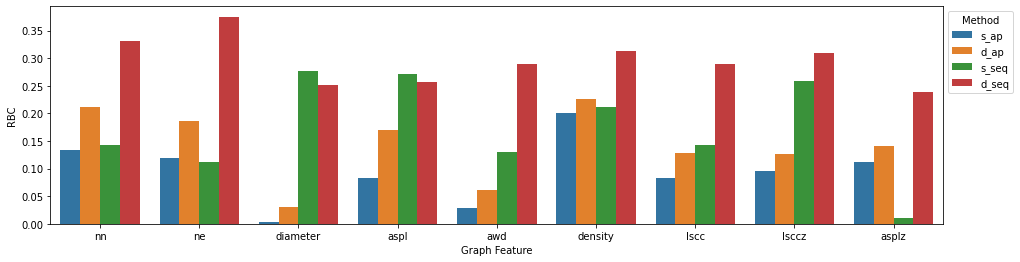

In [7]:
### Bar chart
barchart = pd.DataFrame(columns=('feature', 'Graph Feature', 'Method', 'RBC'))
index = 0
for feature in graph:
  rbc = abs(pg.mwu(df.loc[df['anypsychosis'] == 1][feature].dropna(), df.loc[df['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['RBC'].tolist()[0])
  method = feature.split(' ')[0]
  gfeat = feature.split(' ')[1]
  barchart.loc[index] = [feature, gfeat,method,rbc]  
  index += 1
barchart

f, ax = plt.subplots(figsize=(16, 4))

ax = sns.barplot(x="Graph Feature", y="RBC", hue="Method", data=barchart)
plt.legend(loc='upper right')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Method')

plt.savefig('/content/drive/MyDrive/Northwell Pipelines/Statistics/journaling_barplot.png', bbox_inches='tight', dpi=300)

In [17]:
### Matching for sex
df_np_m = df.loc[df['anypsychosis'] == 0].loc[df['demo_sex'] == 'Male']
df_np_f = df.loc[df['anypsychosis'] == 0].loc[df['demo_sex'] == 'Female'].sample(35 , replace=False, random_state=1)
df_p_m = df.loc[df['anypsychosis'] == 1].loc[df['demo_sex'] == 'Male'].sample(41, replace=False, random_state=1)
df_p_f = df.loc[df['anypsychosis'] == 1].loc[df['demo_sex'] == 'Female']
df_m_sex = pd.concat([df_np_m, df_np_f, df_p_m, df_p_f], ignore_index=True)

df_m_sex # n = 152

bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df_m_sex.loc[df_m_sex['anypsychosis'] == 1][feature].dropna(), df_m_sex.loc[df_m_sex['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df_m_sex.loc[df_m_sex['anypsychosis'] == 1][feature].dropna(), df_m_sex.loc[df_m_sex['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')
  print('---')

s_ap nn 
       U-val alternative     p-val       RBC      CLES
MWU  2435.5   two-sided  0.095772  0.156683  0.421659
---
s_ap ne 
       U-val alternative     p-val       RBC      CLES
MWU  2478.5   two-sided  0.131764  0.141794  0.429103
---
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  2863.5   two-sided  0.927649  0.008483  0.495758
---
s_ap aspl 
       U-val alternative     p-val       RBC      CLES
MWU  2599.0   two-sided  0.287733  0.100069  0.449965
---
s_ap awd 
       U-val alternative     p-val      RBC      CLES
MWU  2848.0   two-sided  0.884272  0.01385  0.493075
---
s_ap density 
       U-val alternative     p-val       RBC      CLES
MWU  3466.0   two-sided  0.033332 -0.200139  0.600069
---
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  2606.0   two-sided  0.298997  0.097645  0.451177
---
s_ap lsccz 
       U-val alternative     p-val       RBC      CLES
MWU  3299.0   two-sided  0.130363 -0.142313  0.571157
---
s_ap as

In [16]:
###Matching for Race

for index, row in df.iterrows():
  if row['demo_race'] == 'Black':
    df.at[index,'race'] = 'AfricanAmerican'
  elif row['demo_race'] == 'White':
    df.at[index,'race'] = 'Caucasian'
  elif row['demo_race'] == 'Asian':
    df.at[index,'race'] = 'Asian'
  else:
    df.at[index,'race'] = 'Other'


df_np_af = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'AfricanAmerican']
df_np_as = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Asian'].sample(11, replace=False, random_state=1)
df_np_ca = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Caucasian'].sample(20, replace=False, random_state=1)
df_np_ot = df.loc[df['anypsychosis'] == 0].loc[df['race'] == 'Other'].sample(19,replace=False, random_state=1)
df_p_af = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'AfricanAmerican'].sample(22, replace=False, random_state=1)
df_p_as =df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Asian']
df_p_ca = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Caucasian']
df_p_ot = df.loc[df['anypsychosis'] == 1].loc[df['race'] == 'Other']

df_m_race = pd.concat([df_np_af, df_np_as, df_np_ca,df_np_ot,df_p_af, df_p_as, df_p_ca,df_p_ot], ignore_index=True)
df_m_race # n = 144

bonf = 0.05/144

for feature in graph:
  print(feature,'\n', pg.mwu(df_m_race.loc[df_m_race['anypsychosis'] == 1][feature].dropna(), df_m_race.loc[df_m_race['anypsychosis'] == 0][feature].dropna(), alternative='two-sided'))
  p = pg.mwu(df_m_race.loc[df_m_race['anypsychosis'] == 1][feature].dropna(), df_m_race.loc[df_m_race['anypsychosis'] == 0][feature].dropna(), alternative='two-sided')['p-val'].tolist()[0]
  if p < bonf:
    print('**Bonf Significant**')
  print('---')

s_ap nn 
       U-val alternative     p-val       RBC      CLES
MWU  2137.5   two-sided  0.119031  0.151786  0.424107
---
s_ap ne 
       U-val alternative     p-val      RBC      CLES
MWU  2164.0   two-sided  0.146881  0.14127  0.429365
---
s_ap diameter 
       U-val alternative     p-val       RBC      CLES
MWU  2612.5   two-sided  0.699138 -0.036706  0.518353
---
s_ap aspl 
       U-val alternative     p-val      RBC      CLES
MWU  2397.0   two-sided  0.617178  0.04881  0.475595
---
s_ap awd 
       U-val alternative    p-val       RBC      CLES
MWU  2513.0   two-sided  0.97884  0.002778  0.498611
---
s_ap density 
       U-val alternative     p-val       RBC      CLES
MWU  3054.0   two-sided  0.029487 -0.211905  0.605952
---
s_ap lscc 
       U-val alternative     p-val       RBC      CLES
MWU  2333.5   two-sided  0.447189  0.074008  0.462996
---
s_ap lsccz 
       U-val alternative     p-val       RBC      CLES
MWU  2844.0   two-sided  0.186827 -0.128571  0.564286
---
s_ap asplz 

**Figure 2 - A** (Bonferonni Survived Relations)

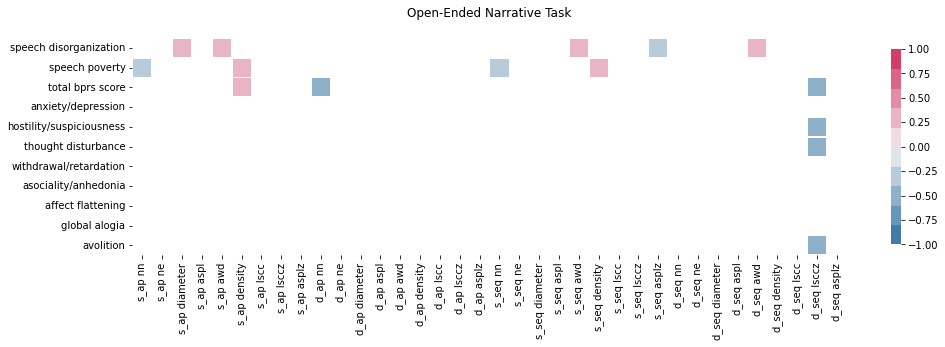

In [ ]:
df_corr = df[clinical+graph].copy()
corr = df_corr.corr(method='spearman')
corr = corr.iloc[0:11,11:]
bonf = len(graph) * len(clinical)
f, ax = plt.subplots(figsize=(16, 4))

cmap = sns.diverging_palette(240, 0, n=10)
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            df2 = df[[col,col2]].dropna().copy()
            _ , p = stats.spearmanr(df2[col],df2[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


p_values = corr_sig(df_corr)
p_values = p_values[0:11,11:]
mask = np.invert(p_values<(0.0001)) 

sns.heatmap(corr,mask=mask,  cmap = cmap , fmt=".2", vmin=-1, vmax=1,center=0, linewidths=0.75, linecolor='white', cbar_kws={"shrink": 0.9}) #, #annot=True,
plt.title("Open-Ended Narrative Task\n", fontsize =12)
plt.savefig('/content/drive/MyDrive/Northwell Pipelines/Statistics/journaling_heatmap.png', bbox_inches='tight', dpi=300)

**VIF Comparisons**

In [ ]:
#s_ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

s_ap = ['s_ap nn', 's_ap ne','s_ap diameter','s_ap aspl', 's_ap awd', 's_ap density','s_ap lscc', 's_ap lsccz','s_ap asplz']

s_ap_connectedness = [ 's_ap awd', 's_ap density','s_ap lscc']
s_ap_size = ['s_ap ne','s_ap diameter','s_ap aspl']
s_ap_organization = [ 's_ap lsccz']

s_ap = ['s_ap diameter','s_ap awd', 's_ap density','s_ap lscc']

vif_data = pd.DataFrame()
X = add_constant(df[s_ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,34.314139
4,s_ap lscc,3.778014
2,s_ap awd,2.607664
1,s_ap diameter,2.538434
3,s_ap density,1.528512


In [ ]:
d_ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


d_ap = ['d_ap nn', 'd_ap ne', 'd_ap diameter', 'd_ap aspl','d_ap awd', 'd_ap density', 'd_ap lscc','d_ap lsccz', 'd_ap asplz']


# VIF dataframe

d_ap_size = ['d_ap nn','d_ap diameter', 'd_ap aspl']
d_ap_connectedness = ['d_ap awd', 'd_ap density', 'd_ap lscc']
d_ap_organization = [ 'd_ap asplz']

d_ap = ['d_ap diameter', 'd_ap density', 'd_ap lscc','d_ap asplz' ]

vif_data = pd.DataFrame()
X = add_constant(df[d_ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,95.532553
3,d_ap lscc,3.688255
4,d_ap asplz,3.503163
1,d_ap diameter,1.577168
2,d_ap density,1.254291


In [ ]:
#ap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# VIF dataframe

ap = ['s_ap diameter','s_ap awd', 's_ap density', 'd_ap diameter', 'd_ap density', 'd_ap lscc','d_ap asplz' ]

vif_data = pd.DataFrame()
X = add_constant(df[ap].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,100.005461
7,d_ap asplz,4.077907
6,d_ap lscc,3.970347
2,s_ap awd,3.464444
1,s_ap diameter,2.653569
4,d_ap diameter,2.088606
3,s_ap density,1.989009
5,d_ap density,1.868343


In [ ]:
#s_seq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe
s_seq = ['s_seq nn', 's_seq ne', 's_seq diameter', 's_seq aspl','s_seq awd', 's_seq density', 's_seq lscc','s_seq lsccz','s_seq asplz']


s_seq_size = ['s_seq ne', 's_seq aspl']
s_seq_connectedness = ['s_seq awd', 's_seq density', 's_seq lscc']
s_seq_organization = ['s_seq lsccz','s_seq asplz']

s_seq = ['s_seq ne', 's_seq aspl','s_seq awd', 's_seq density','s_seq lsccz']

vif_data = pd.DataFrame()
X = add_constant(df[s_seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,148.969703
2,s_seq aspl,3.459843
1,s_seq ne,3.440254
4,s_seq density,3.327955
5,s_seq lsccz,2.656166
3,s_seq awd,1.571517


In [ ]:
#d_seq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


d_seq = ['d_seq nn', 'd_seq ne','d_seq diameter', 'd_seq aspl', 'd_seq awd', 'd_seq density', 'd_seq lscc','d_seq lsccz','d_seq asplz']

# VIF dataframe

d_seq_size = [ 'd_seq ne', 'd_seq aspl']
d_connectedness = ['d_seq awd', 'd_seq density', 'd_seq lscc']
d_seq = ['d_seq lsccz','d_seq asplz']

d_seq = [ 'd_seq ne', 'd_seq awd',  'd_seq lsccz','d_seq asplz' ]

vif_data = pd.DataFrame()
X = add_constant(df[d_seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,2173.308265
1,d_seq ne,2.987843
2,d_seq awd,2.713852
3,d_seq lsccz,1.983690
4,d_seq asplz,1.862774


In [ ]:
#seq



#wseq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

seq = ['s_seq ne','s_seq awd', 's_seq density','s_seq lsccz','d_seq ne', 'd_seq lsccz','d_seq asplz']

vif_data = pd.DataFrame()
X = add_constant(df[seq].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,1854.830839
1,s_seq ne,3.616646
3,s_seq density,2.886533
2,s_seq awd,2.884856
4,s_seq lsccz,2.626532
6,d_seq lsccz,2.621558
5,d_seq ne,2.375684
7,d_seq asplz,2.309914


In [ ]:
#graph



#wseq
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe

graph = ['s_ap diameter', 's_ap density', 'd_ap diameter', 'd_ap density', 'd_ap lscc','d_ap asplz','s_seq awd','s_seq lsccz','d_seq ne', 'd_seq lsccz','d_seq asplz']

vif_data = pd.DataFrame()
X = add_constant(df[graph].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,1525.941782
6,d_ap asplz,4.168494
5,d_ap lscc,4.102150
10,d_seq lsccz,3.154146
11,d_seq asplz,2.872056
1,s_ap diameter,2.856092
7,s_seq awd,2.779753
8,s_seq lsccz,2.758979
9,d_seq ne,2.285413
3,d_ap diameter,2.227176


**Figure 2-B**

In [ ]:
#graph
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF dataframe


graph2 = ['s_ap diameter', 's_ap density', 'd_ap diameter', 'd_ap density', 'd_ap lscc','d_ap lsccz', 's_seq diameter','s_seq awd','s_seq lsccz','d_seq ne','d_seq diameter','d_seq lsccz']



vif_data = pd.DataFrame()
X = add_constant(df[graph2].dropna())
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

vif_data.sort_values(by=['VIF'], ascending=False)

,feature,VIF
0,const,1629.762965
7,s_seq diameter,4.233193
11,d_seq diameter,4.206348
5,d_ap lscc,3.851004
6,d_ap lsccz,3.733770
9,s_seq lsccz,3.439665
12,d_seq lsccz,2.961999
1,s_ap diameter,2.869323
8,s_seq awd,2.692398
2,s_ap density,2.293963


In [ ]:
features_score = {}
features_df = []
graph2 = ['s_ap diameter', 's_ap density', 'd_ap diameter', 'd_ap density', 'd_ap lscc','d_ap asplz','s_seq awd','s_seq lsccz','d_seq ne', 'd_seq lsccz','d_seq asplz']

In [ ]:
### TLC

bonf = 0.0001


for measure in language:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, ' n = ', len(df_2), feature,'p = ',p,'rho = ', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['language','randomness', feature, measure, p, rho])

speech disorganization  n =  201 s_ap diameter p =  8.026887025220664e-06 rho =  0.30908185755728745
speech disorganization  n =  201 s_seq awd p =  1.7541883610272893e-07 rho =  0.3583721774718198
speech poverty  n =  201 s_ap density p =  1.0224854127548567e-06 rho =  0.3367021489781149


In [ ]:
### Disease Severity



for measure in severity:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, '\tn =', len(df_2), feature,'\tp =',p,'\trho =', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['disease severity','randomness', feature, measure, p, rho])

total bprs score 	n = 98 s_ap density 	p = 5.861032679727664e-05 	rho = 0.3943922160601783
total bprs score 	n = 90 d_seq lsccz 	p = 7.37906526838534e-06 	rho = -0.4529316593293766


In [ ]:
#### Psychopathological Dimensions


for measure in dimension:
  for feature in graph2:
    df_2 = df[[feature,measure]].dropna().copy()
    x = df_2[feature] 
    y = df_2[measure]
    rho,p = stats.spearmanr(x, y)
    if p < bonf:
      print(measure, '\tn =', len(df_2), feature,'\tp =',p,'\trho =', rho)
      features_score[feature] = features_score.get(feature, 0) + 1
      features_df.append(['psychopathological dimension','randomness', feature, measure, p, rho])

hostility/suspiciousness 	n = 90 d_seq lsccz 	p = 8.226171987328195e-06 	rho = -0.45084103748739657
thought disturbance 	n = 90 d_seq lsccz 	p = 8.548405926058e-05 	rho = -0.402098328920614
avolition 	n = 90 d_seq lsccz 	p = 2.687583428036842e-05 	rho = -0.42712691536036734


In [ ]:
features_df = pd.DataFrame(features_df, columns = ['domain','type', 'graph_feature', 'clinical_feature', 'p','rho'])
features_df['weight'] = abs(features_df['rho'])
semantic = ap+s2ap
structural = seq+w30
features_df

,domain,type,graph_feature,clinical_feature,p,rho,weight
0,language,randomness,s_ap diameter,speech disorganization,8.026887e-06,0.309082,0.309082
1,language,randomness,s_seq awd,speech disorganization,1.754188e-07,0.358372,0.358372
2,language,randomness,s_ap density,speech poverty,1.022485e-06,0.336702,0.336702
3,disease severity,randomness,s_ap density,total bprs score,5.861033e-05,0.394392,0.394392
4,disease severity,randomness,d_seq lsccz,total bprs score,7.379065e-06,-0.452932,0.452932
5,psychopathological dimension,randomness,d_seq lsccz,hostility/suspiciousness,8.226172e-06,-0.450841,0.450841
6,psychopathological dimension,randomness,d_seq lsccz,thought disturbance,8.548406e-05,-0.402098,0.402098
7,psychopathological dimension,randomness,d_seq lsccz,avolition,2.687583e-05,-0.427127,0.427127


In [ ]:
g = igraph.Graph.DataFrame(features_df.iloc[0:,2:].drop('p',axis=1), directed=False)
semantic = s_ap+d_ap
structural = s_seq+d_seq
for i in range(0,g.vcount()):
  if g.vs(i)["name"][0] in semantic:
    #print(g.vs(i)["name"])
    g.vs(i)["color"] = "dodgerblue"
  elif g.vs(i)['name'][0] in structural:
    g.vs(i)["color"] = "crimson"
  elif g.vs(i)['name'][0] in language:
    g.vs(i)["color"] = "orchid"
  elif g.vs(i)['name'][0] in severity:
    g.vs(i)["color"] = "webgreen"
  elif g.vs(i)['name'][0] in dimension:
    g.vs(i)["color"] = "salmon"

g.es()['edge_label'] = g.es()["weight"]

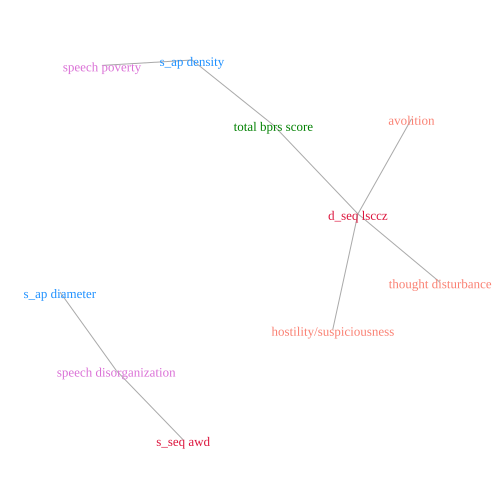

In [ ]:
visual_style = {}
visual_style["vertex_label"] = g.vs()["name"]
visual_style["vertex_size"] = 0
visual_style["vertex_font"] = "Times"
visual_style["vertex_label_size"] = 13
visual_style["vertex_label_color"] =  g.vs()["color"]
visual_style["layout"] =  g.layout(layout='auto')
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 60
visual_style["edge_width"] = 1
visual_style["edge_color"] = 'darkgrey'
igraph.plot(g, **visual_style)
igraph.plot(g,**visual_style, target='/content/drive/MyDrive/Northwell Pipelines/Statistics/journaling_graph.png', dpi=1000)